In [1]:
from keras.models import Sequential, load_model # type of model 
from keras.layers import Dense, Activation, Conv2D,MaxPooling2D, Dropout, Flatten
from keras.optimizers import sgd, Adadelta
from keras.datasets import mnist
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [18, 12]
plt.rcParams.update({'font.size': 36})


Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test  = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train = x_train/255
x_test  = x_test/255
y_train = to_categorical(y_train,10)
y_test  = to_categorical(y_test ,10)

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
from google.colab import files
files.upload()

Saving LeNetTrainedAvgPool+Softmax.h5 to LeNetTrainedAvgPool+Softmax.h5


{'LeNetTrainedAvgPool+Softmax.h5': b'\x89HDF\r\n\x1a\n\x00\x00\x00\x00\x00\x08\x08\x00\x04\x00\x10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xc0\x13\x01\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00`\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x88\x00\x00\x00\x00\x00\x00\x00\xa8\x02\x00\x00\x00\x00\x00\x00\x01\x00\x08\x00\x01\x00\x00\x00\x18\x00\x00\x00\x00\x00\x00\x00\x10\x00\x10\x00\x00\x00\x00\x00 \x03\x00\x00\x00\x00\x00\x00\x18\x01\x00\x00\x00\x00\x00\x00TREE\x00\x00\x01\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x18\x00\x00\x00\x00\x00\x00\x18\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [5]:
model = load_model('LeNetTrainedAvgPool+Softmax.h5')
index=1


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


# **Trained Full Model Output (Seven Layers)**

In [6]:
model.summary()
w = np.reshape(x_train[index],(28,28))
p = model.predict(np.reshape(w,(1,28,28,1)))
np.set_printoptions(4,10000,150)
np.set_printoptions(suppress=True)
print (repr(p))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         150       
_________________________________________________________________
average_pooling2d_1 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 12)          1800      
_________________________________________________________________
average_pooling2d_2 (Average (None, 4, 4, 12)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1920      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total para

# **Trained Poped Model Output (Six Layers)**

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         150       
_________________________________________________________________
average_pooling2d_1 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 12)          1800      
_________________________________________________________________
average_pooling2d_2 (Average (None, 4, 4, 12)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1920      
Total params: 3,870
Trainable params: 3,870
Non-trainable params: 0
_________________________________________________________________
[[-10.92

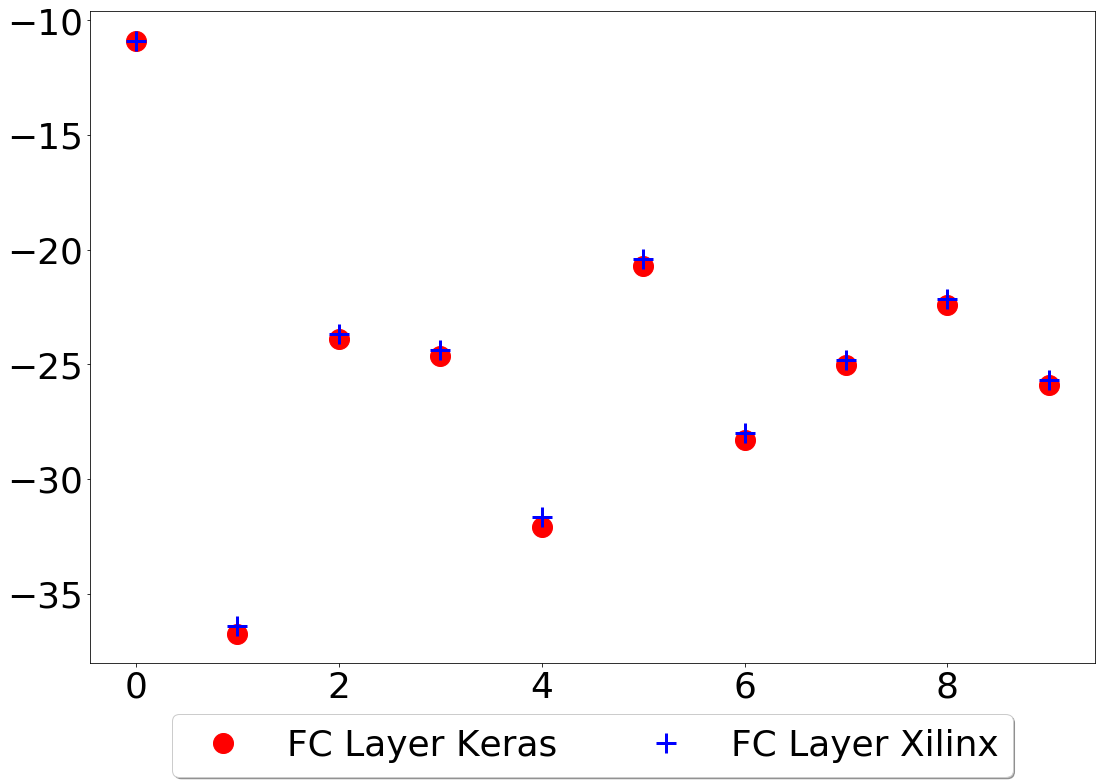

In [16]:

index = 1
model1 = Sequential()
for layer in model.layers[:-1]:
  model1.add(layer)# just exclude last layer from copying
model1.summary()
w = np.reshape(x_train[index],(28,28))
p = model1.predict(np.reshape(w,(1,28,28,1)))
np.set_printoptions(4,10000,150)
np.set_printoptions(suppress=True)
p = np.array(p)
q = np.array([4294253288, 4292580747, 4293416341, 4293370214, 4292892588, 4293628702, 4293132660, 4293339474, 4293513817, 4293283149]).reshape((10,1))/65536
L = 10
K = 1
for i in range(0 , L):
  for j in range(0 , K):
    if(q[i,j]>60000):
      q[i,j] = q[i,j]-65536;
np.set_printoptions(4,10000,150)
np.set_printoptions(suppress=True)

print(p)
print(q.T)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(p.T, "ro", markersize=20, label='FC Layer Keras')
ax.plot(q, "b+", markeredgewidth=3, markersize=20,label='FC Layer Xilinx')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),shadow=True, ncol=2)
print (np.sqrt(np.mean(np.square(p.T-q))))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         150       
_________________________________________________________________
average_pooling2d_1 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 12)          1800      
_________________________________________________________________
average_pooling2d_2 (Average (None, 4, 4, 12)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1920      
Total params: 3,870
Trainable params: 3,870
Non-trainable params: 0
_________________________________________________________________
[[-22.56

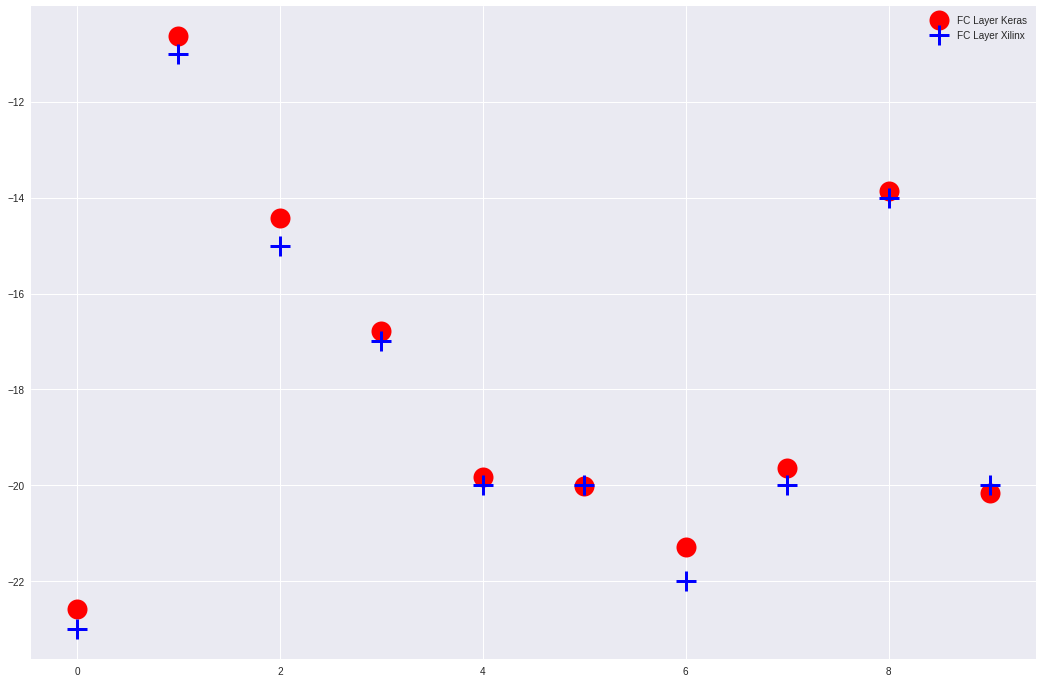

In [0]:
index = 3
model1 = Sequential()
for layer in model.layers[:-1]:
  model1.add(layer)# just exclude last layer from copying
model1.summary()
w = np.reshape(x_train[index],(28,28))
p = model1.predict(np.reshape(w,(1,28,28,1)))
np.set_printoptions(4,10000,150)
np.set_printoptions(suppress=True)
p = np.array(p)
q = np.array([4294253288, 4292580747, 4293416341, 4293370214, 4292892588, 4293628702, 4293132660, 4293339474, 4293513817, 4293283149]).reshape((10,1))/65536
L = 10
K = 1
for i in range(0 , L):
  for j in range(0 , K):
    if(q[i,j]>60000):
      q[i,j] = q[i,j]-65536;
np.set_printoptions(4,10000,150)
np.set_printoptions(suppress=True)

print(p)
print(q.T)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(p.T, "ro", markersize=20, label='FC Layer Keras')
ax.plot(q, "b+", markeredgewidth=3, markersize=20,label='FC Layer Xilinx')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),shadow=True, ncol=2)
print (np.sqrt(np.mean(np.square(p.T-q))))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         150       
_________________________________________________________________
average_pooling2d_1 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 12)          1800      
_________________________________________________________________
average_pooling2d_2 (Average (None, 4, 4, 12)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1920      
Total params: 3,870
Trainable params: 3,870
Non-trainable params: 0
_________________________________________________________________
[[-32.79

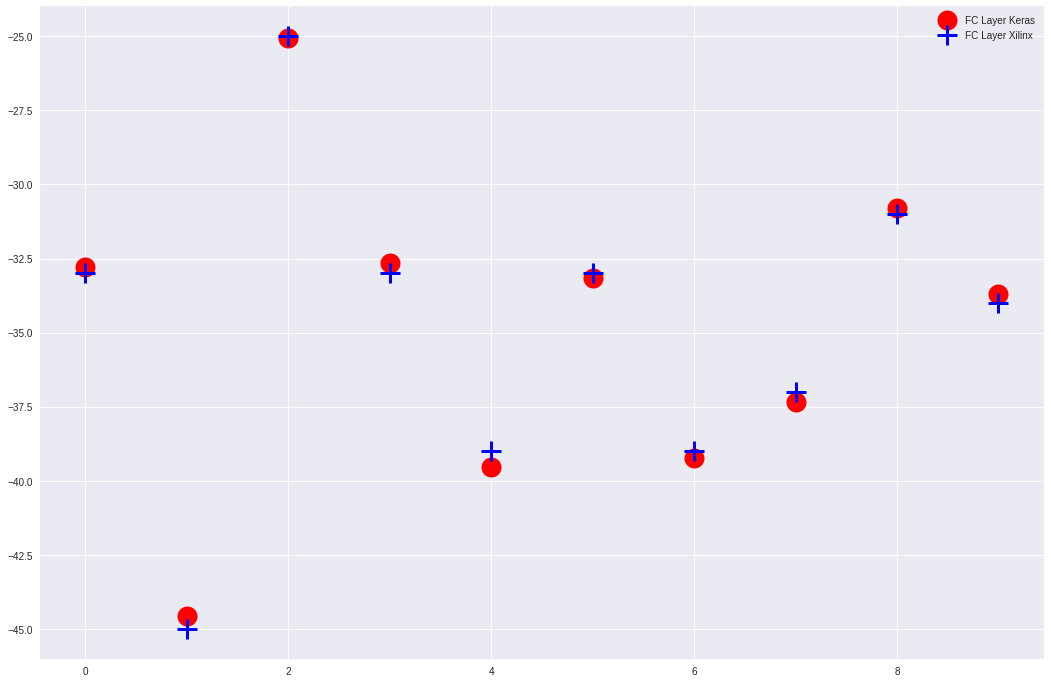

In [0]:
index = 5
model1 = Sequential()
for layer in model.layers[:-1]:
  model1.add(layer)# just exclude last layer from copying
model1.summary()
w = np.reshape(x_train[index],(28,28))
p = model1.predict(np.reshape(w,(1,28,28,1)))
np.set_printoptions(4,10000,150)
np.set_printoptions(suppress=True)
p = np.array(p)
q = np.array([4294967263, 4294967251, 4294967271, 4294967263, 4294967257, 4294967263, 4294967257, 4294967259, 4294967265, 4294967262]).reshape((10,1))
L = 10
K = 1
for i in range(0 , L):
  for j in range(0 , K):
    if(q[i,j]>4200000000):
      q[i,j] = q[i,j]-4294967296;
np.set_printoptions(4,10000,150)
np.set_printoptions(suppress=True)

print(p)
print(q.T)
plt.plot(p.T, "ro", markersize=20)
fig = plt.plot(q, "b+", markeredgewidth=3, markersize=20)
plt.legend(["FC Layer Keras", "FC Layer Xilinx"])
print (np.sqrt(np.mean(np.square(p.T-q))))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         150       
_________________________________________________________________
average_pooling2d_1 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 12)          1800      
_________________________________________________________________
average_pooling2d_2 (Average (None, 4, 4, 12)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1920      
Total params: 3,870
Trainable params: 3,870
Non-trainable params: 0
_________________________________________________________________
[[-34.80

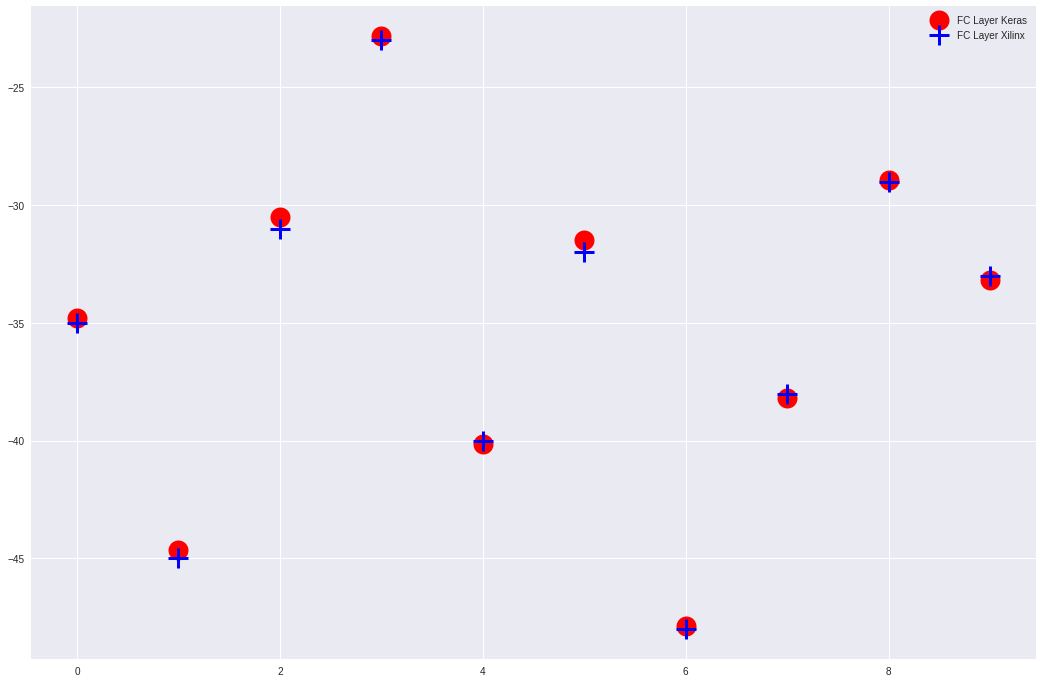

In [0]:
index = 7
model1 = Sequential()
for layer in model.layers[:-1]:
  model1.add(layer)# just exclude last layer from copying
model1.summary()
w = np.reshape(x_train[index],(28,28))
p = model1.predict(np.reshape(w,(1,28,28,1)))
np.set_printoptions(4,10000,150)
np.set_printoptions(suppress=True)
p = np.array(p)
q = np.array([4294967261, 4294967251, 4294967265, 4294967273, 4294967256, 4294967264, 4294967248, 4294967258, 4294967267, 4294967263]).reshape((10,1))
L = 10
K = 1
for i in range(0 , L):
  for j in range(0 , K):
    if(q[i,j]>4200000000):
      q[i,j] = q[i,j]-4294967296;
np.set_printoptions(4,10000,150)
np.set_printoptions(suppress=True)

print(p)
print(q.T)
plt.plot(p.T, "ro", markersize=20)
fig = plt.plot(q, "b+", markeredgewidth=3, markersize=20)
plt.legend(["FC Layer Keras", "FC Layer Xilinx"])
print (np.sqrt(np.mean(np.square(p.T-q))))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         150       
_________________________________________________________________
average_pooling2d_1 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 12)          1800      
_________________________________________________________________
average_pooling2d_2 (Average (None, 4, 4, 12)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1920      
Total params: 3,870
Trainable params: 3,870
Non-trainable params: 0
_________________________________________________________________
[[-20.28

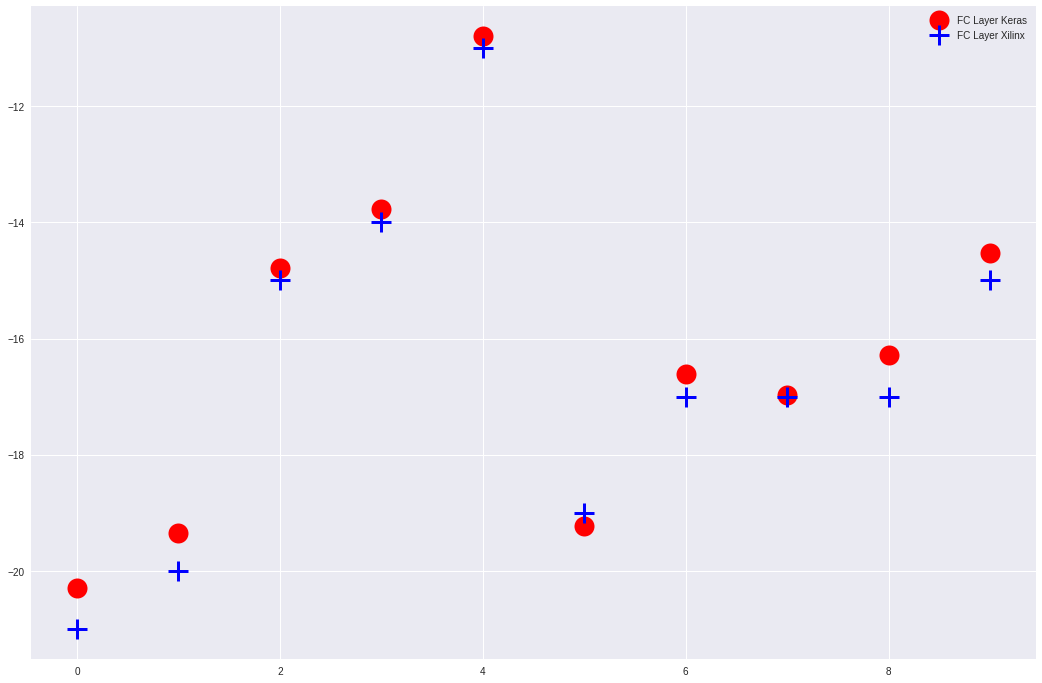

In [0]:
index = 2
model1 = Sequential()
for layer in model.layers[:-1]:
  model1.add(layer)# just exclude last layer from copying
model1.summary()
w = np.reshape(x_train[index],(28,28))
p = model1.predict(np.reshape(w,(1,28,28,1)))
np.set_printoptions(4,10000,150)
np.set_printoptions(suppress=True)
p = np.array(p)
q = np.array([4294967275, 4294967276, 4294967281, 4294967282, 4294967285, 4294967277, 4294967279, 4294967279, 4294967279, 4294967281]).reshape((10,1))
#q = np.array([60402, 60597, 61772, 62025, 62796, 60680, 61316, 61234, 61417, 61835]).reshape((10,1))
L = 10
K = 1
for i in range(0 , L):
  for j in range(0 , K):
    if(q[i,j]>4200000000):
      q[i,j] = (q[i,j]-4294967296);#/256;
np.set_printoptions(4,10000,150)
np.set_printoptions(suppress=True)

print(p)
print(q.T)
plt.plot(p.T, "ro", markersize=20)
fig = plt.plot(q, "b+", markeredgewidth=3, markersize=20)
plt.legend(["FC Layer Keras", "FC Layer Xilinx"])
print (np.sqrt(np.mean(np.square(p.T-q))))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         150       
_________________________________________________________________
average_pooling2d_1 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 12)          1800      
_________________________________________________________________
average_pooling2d_2 (Average (None, 4, 4, 12)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1920      
Total params: 3,870
Trainable params: 3,870
Non-trainable params: 0
_________________________________________________________________
[[-25.73

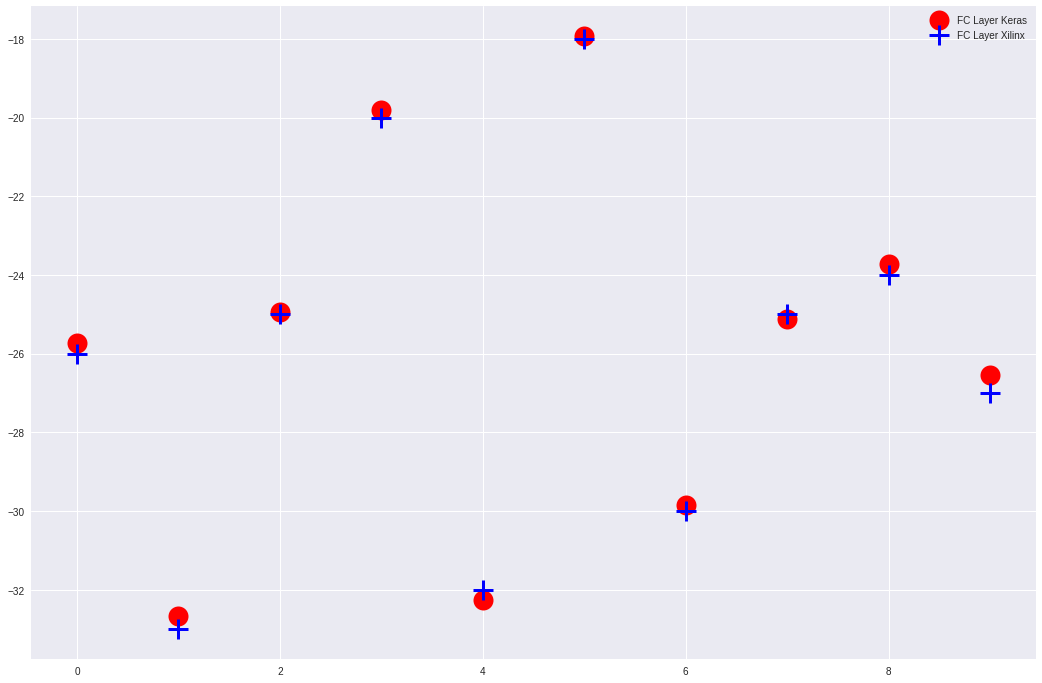

In [0]:
index = 0
model1 = Sequential()
for layer in model.layers[:-1]:
  model1.add(layer)# just exclude last layer from copying
model1.summary()
w = np.reshape(x_train[index],(28,28))
p = model1.predict(np.reshape(w,(1,28,28,1)))
np.set_printoptions(4,10000,150)
np.set_printoptions(suppress=True)
p = np.array(p)
q = np.array([4294967270, 4294967263, 4294967271, 4294967276, 4294967264, 4294967278, 4294967266, 4294967271, 4294967272, 4294967269]).reshape((10,1))
L = 10
K = 1
for i in range(0 , L):
  for j in range(0 , K):
    if(q[i,j]>4200000000):
      q[i,j] = q[i,j]-4294967296;
np.set_printoptions(4,10000,150)
np.set_printoptions(suppress=True)

print(p)
print(q.T)
plt.plot(p.T, "ro", markersize=20)
fig = plt.plot(q, "b+", markeredgewidth=3, markersize=20)
plt.legend(["FC Layer Keras", "FC Layer Xilinx"])
print (np.sqrt(np.mean(np.square(p.T-q))))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         150       
_________________________________________________________________
average_pooling2d_1 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 12)          1800      
_________________________________________________________________
average_pooling2d_2 (Average (None, 4, 4, 12)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1920      
Total params: 3,870
Trainable params: 3,870
Non-trainable params: 0
_________________________________________________________________
[[-33.61

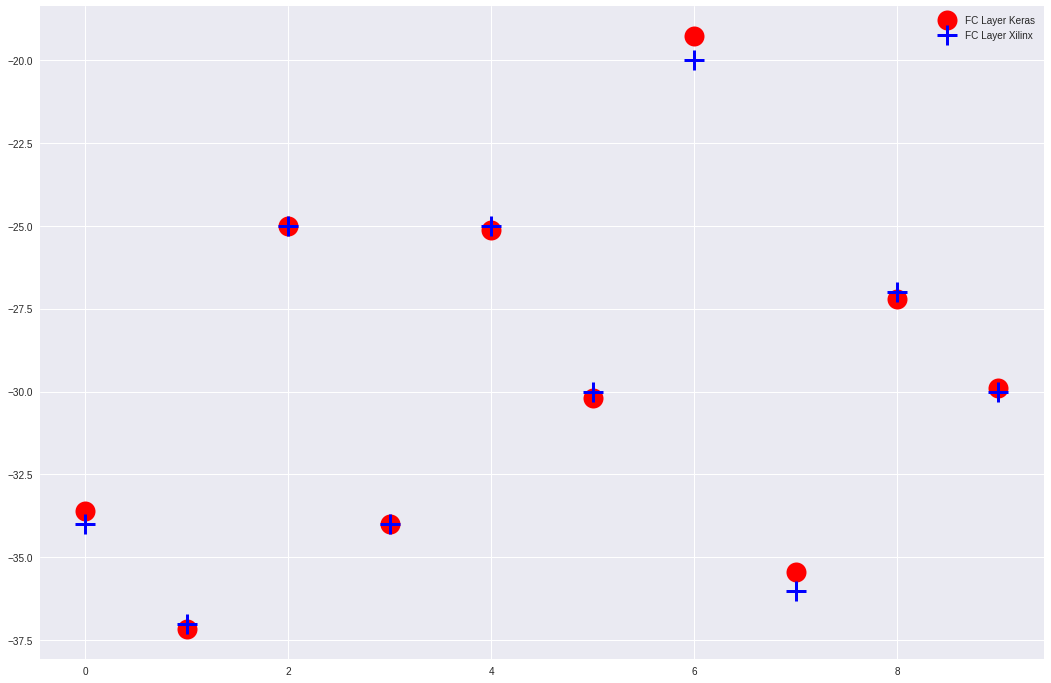

In [0]:
index = 13
model1 = Sequential()
for layer in model.layers[:-1]:
  model1.add(layer)# just exclude last layer from copying
model1.summary()
w = np.reshape(x_train[index],(28,28))
p = model1.predict(np.reshape(w,(1,28,28,1)))
np.set_printoptions(4,10000,150)
np.set_printoptions(suppress=True)
p = np.array(p)
q = np.array([4294967262, 4294967259, 4294967271, 4294967262, 4294967271, 4294967266, 4294967276, 4294967260, 4294967269, 4294967266]).reshape((10,1))
L = 10
K = 1
for i in range(0 , L):
  for j in range(0 , K):
    if(q[i,j]>4200000000):
      q[i,j] = q[i,j]-4294967296;
np.set_printoptions(4,10000,150)
np.set_printoptions(suppress=True)

print(p)
print(q.T)
plt.plot(p.T, "ro", markersize=20)
fig = plt.plot(q, "b+", markeredgewidth=3, markersize=20)
plt.legend(["FC Layer Keras", "FC Layer Xilinx"])
print (np.sqrt(np.mean(np.square(p.T-q))))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         150       
_________________________________________________________________
average_pooling2d_1 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 12)          1800      
_________________________________________________________________
average_pooling2d_2 (Average (None, 4, 4, 12)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1920      
Total params: 3,870
Trainable params: 3,870
Non-trainable params: 0
_________________________________________________________________
[[-27.65

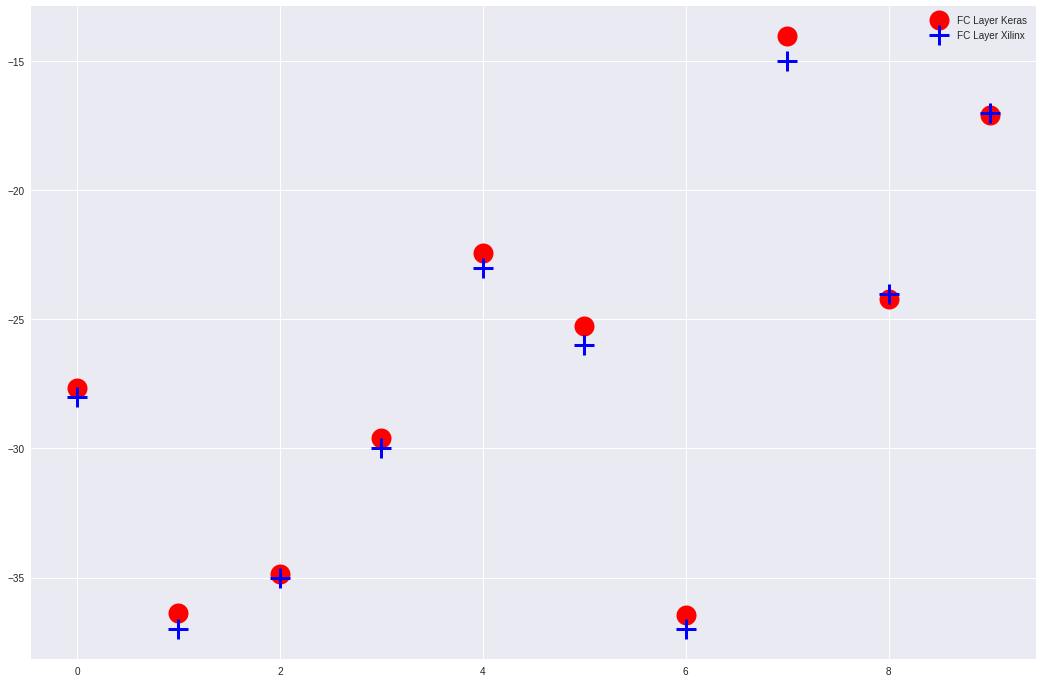

In [0]:
index = 15
model1 = Sequential()
for layer in model.layers[:-1]:
  model1.add(layer)# just exclude last layer from copying
model1.summary()
w = np.reshape(x_train[index],(28,28))
p = model1.predict(np.reshape(w,(1,28,28,1)))
np.set_printoptions(4,10000,150)
np.set_printoptions(suppress=True)
p = np.array(p)
q = np.array([4294967268, 4294967259, 4294967261, 4294967266, 4294967273, 4294967270, 4294967259, 4294967281, 4294967272, 4294967279]).reshape((10,1))
L = 10
K = 1
for i in range(0 , L):
  for j in range(0 , K):
    if(q[i,j]>4200000000):
      q[i,j] = q[i,j]-4294967296;
np.set_printoptions(4,10000,150)
np.set_printoptions(suppress=True)

print(p)
print(q.T)
plt.plot(p.T, "ro", markersize=20)
fig = plt.plot(q, "b+", markeredgewidth=3, markersize=20)
plt.legend(["FC Layer Keras", "FC Layer Xilinx"])
print (np.sqrt(np.mean(np.square(p.T-q))))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         150       
_________________________________________________________________
average_pooling2d_1 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 12)          1800      
_________________________________________________________________
average_pooling2d_2 (Average (None, 4, 4, 12)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1920      
Total params: 3,870
Trainable params: 3,870
Non-trainable params: 0
_________________________________________________________________
[[-35.57

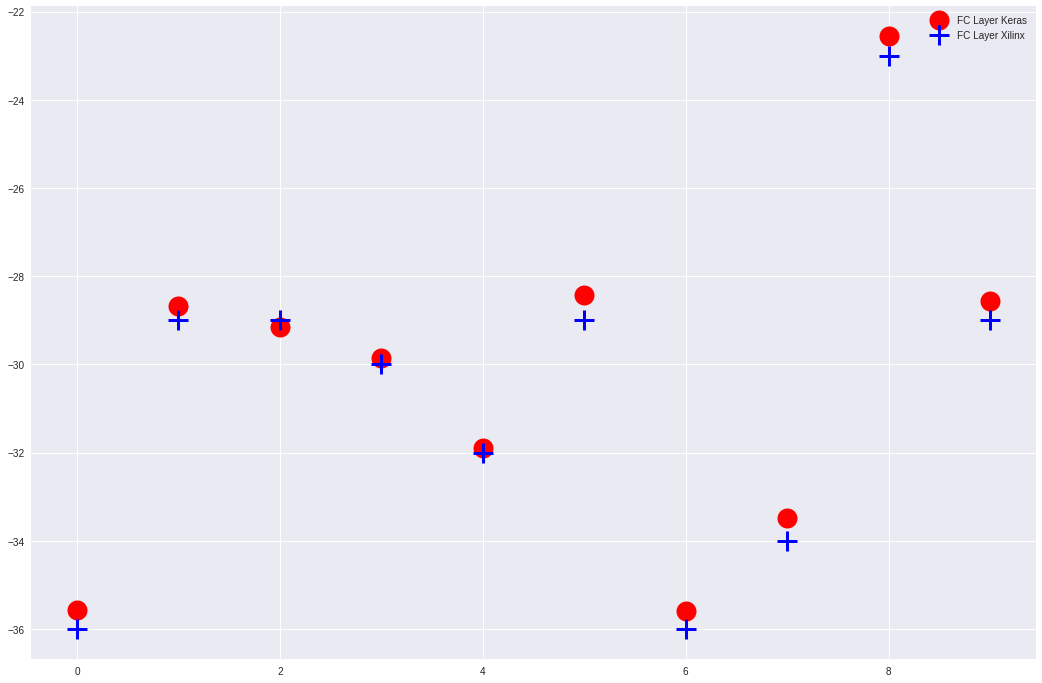

In [0]:
index = 17
model1 = Sequential()
for layer in model.layers[:-1]:
  model1.add(layer)# just exclude last layer from copying
model1.summary()
w = np.reshape(x_train[index],(28,28))
p = model1.predict(np.reshape(w,(1,28,28,1)))
np.set_printoptions(4,10000,150)
np.set_printoptions(suppress=True)
p = np.array(p)
q = np.array([4294967260, 4294967267, 4294967267, 4294967266, 4294967264, 4294967267, 4294967260, 4294967262, 4294967273, 4294967267]).reshape((10,1))
L = 10
K = 1
for i in range(0 , L):
  for j in range(0 , K):
    if(q[i,j]>4200000000):
      q[i,j] = q[i,j]-4294967296;
np.set_printoptions(4,10000,150)
np.set_printoptions(suppress=True)

print(p)
print(q.T)
plt.plot(p.T, "ro", markersize=20)
fig = plt.plot(q, "b+", markeredgewidth=3, markersize=20)
plt.legend(["FC Layer Keras", "FC Layer Xilinx"])
print (np.sqrt(np.mean(np.square(p.T-q))))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         150       
_________________________________________________________________
average_pooling2d_1 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 12)          1800      
_________________________________________________________________
average_pooling2d_2 (Average (None, 4, 4, 12)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1920      
Total params: 3,870
Trainable params: 3,870
Non-trainable params: 0
_________________________________________________________________
[[-33.36

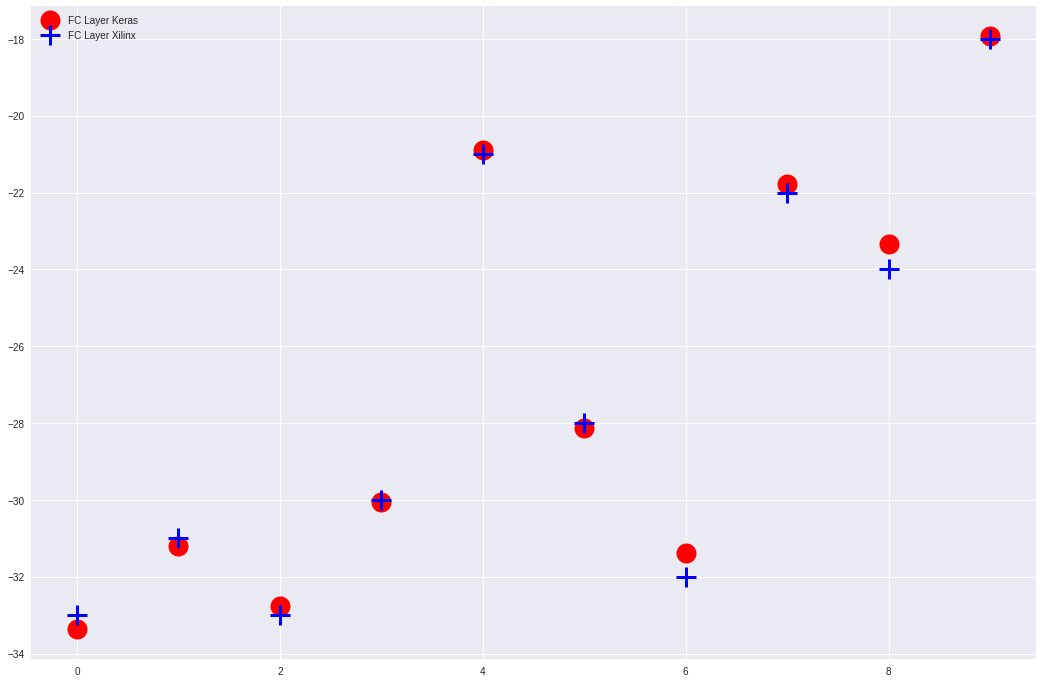

In [0]:
index = 4
model1 = Sequential()
for layer in model.layers[:-1]:
  model1.add(layer)# just exclude last layer from copying
model1.summary()
w = np.reshape(x_train[index],(28,28))
p = model1.predict(np.reshape(w,(1,28,28,1)))
np.set_printoptions(4,10000,150)
np.set_printoptions(suppress=True)
p = np.array(p)
q = np.array([4294967263, 4294967265, 4294967263, 4294967266, 4294967275, 4294967268, 4294967264, 4294967274, 4294967272, 4294967278]).reshape((10,1))
L = 10
K = 1
for i in range(0 , L):
  for j in range(0 , K):
    if(q[i,j]>4200000000):
      q[i,j] = q[i,j]-4294967296;
np.set_printoptions(4,10000,150)
np.set_printoptions(suppress=True)

print(p)
print(q.T)
plt.plot(p.T, "ro", markersize=20)
fig = plt.plot(q, "b+", markeredgewidth=3, markersize=20)
plt.legend(["FC Layer Keras", "FC Layer Xilinx"])
print (np.sqrt(np.mean(np.square(p.T-q))))

# **Trained Poped Model Output (Five Layers)**

In [0]:
model2 = Sequential()
for layer in model1.layers[:-1]:
  model2.add(layer)# just exclude last layer from copying
model2.summary()
w = np.reshape(x_train[index],(28,28))
p = model2.predict(np.reshape(w,(1,28,28,1)))
print(p.shape)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         150       
_________________________________________________________________
average_pooling2d_1 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 12)          1800      
_________________________________________________________________
average_pooling2d_2 (Average (None, 4, 4, 12)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 192)               0         
Total params: 1,950
Trainable params: 1,950
Non-trainable params: 0
_________________________________________________________________
(1, 192)


In [0]:
np.set_printoptions(4,10000,150)
np.set_printoptions(suppress=True)
print (repr(p))
p.shape

array([[ 0.0594, -0.3006,  0.1014, -0.5242,  2.8327, -0.0668,  0.2675,
        -1.4622,  0.7062,  1.0241,  0.8634,  0.5706, -1.827 , -0.0023,
        -0.2179,  0.1723,  3.0221, -0.5284, -0.5811, -0.7083,  0.5337,
        -0.4919,  0.5463, -0.462 , -0.2477,  0.1722, -3.0768, -1.0296,
         2.1158,  0.0234,  0.9   ,  1.4023,  0.5003,  0.718 ,  2.3363,
        -1.6158,  0.7918, -0.4814, -2.3787, -2.2606,  0.2291,  0.5364,
         0.4506, -0.0265,  1.5902, -0.1004,  1.1288, -1.4233, -1.8807,
        -0.1925, -0.6658, -0.2154,  1.5431,  0.0612, -0.7455, -1.0483,
         0.4614, -0.1979, -0.4977, -0.3802, -1.0825, -0.4671, -4.8261,
         0.0289,  0.9062,  1.585 , -0.7708, -0.8024, -0.8115, -0.0008,
        -0.1971, -1.2524, -1.1227,  0.966 , -3.0096,  1.0781,  3.1011,
        -0.9821, -0.3983, -1.7358, -1.4137, -0.389 , -0.4451, -0.521 ,
         0.3613,  0.4449, -0.2138,  0.0734,  0.9619, -0.8642,  0.3749,
         0.3371, -0.41  ,  0.2954, -0.7686,  1.4236,  0.132 , -0.9629,
      

(1, 192)

# **Trained Poped Model Output (Four Layers)**

In [0]:
model3 = Sequential()
for layer in model2.layers[:-1]:
  model3.add(layer)# just exclude last layer from copying
model3.summary()
w = np.reshape(x_train[index],(28,28))
p = model3.predict(np.reshape(w,(1,28,28,1)))
np.set_printoptions(4,10000,150)
np.set_printoptions(suppress=True)
print ((p[:,:,:,0]))
print ((p[:,:,:,1]))
print ((p[:,:,:,2]))
print ((p[:,:,:,3]))
print ((p[:,:,:,4]))
print ((p[:,:,:,5]))
print ((p[:,:,:,6]))
print ((p[:,:,:,7]))
print ((p[:,:,:,8]))
print ((p[:,:,:,9]))
print ((p[:,:,:,10]))
print ((p[:,:,:,11]))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         150       
_________________________________________________________________
average_pooling2d_1 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 12)          1800      
_________________________________________________________________
average_pooling2d_2 (Average (None, 4, 4, 12)          0         
Total params: 1,950
Trainable params: 1,950
Non-trainable params: 0
_________________________________________________________________
[[[ 0.0594 -1.827  -0.2477  0.7918]
  [-1.8807 -1.0825 -1.1227  0.3613]
  [ 0.132   1.1533 -1.3619  0.0502]
  [ 0.5505 -0.1425 -1.0615  0.4306]]]
[[[-0.3006 -0.0023  0.1722 -0.4814]
  [-0.1925 -0.4671  0.966   0.4449]
  [-0.9629 -1.3505 -1.5077 -0.4362]
  [ 0.1455  0.0272

1.2778857097717655
[[ 0.0594  0.0453]
 [-1.827  -1.8094]
 [-0.2477 -0.2646]
 [ 0.7918  0.7721]
 [-1.8807 -1.8613]
 [-1.0825 -1.0832]
 [-1.1227 -1.1061]
 [ 0.3613  0.3389]
 [ 0.132   0.1163]
 [ 1.1533  1.1256]
 [-1.3619 -1.3507]
 [ 0.0502  0.0325]
 [ 0.5505  0.5201]
 [-0.1425 -0.1499]
 [-1.0615 -1.0541]
 [ 0.4306  0.4215]]


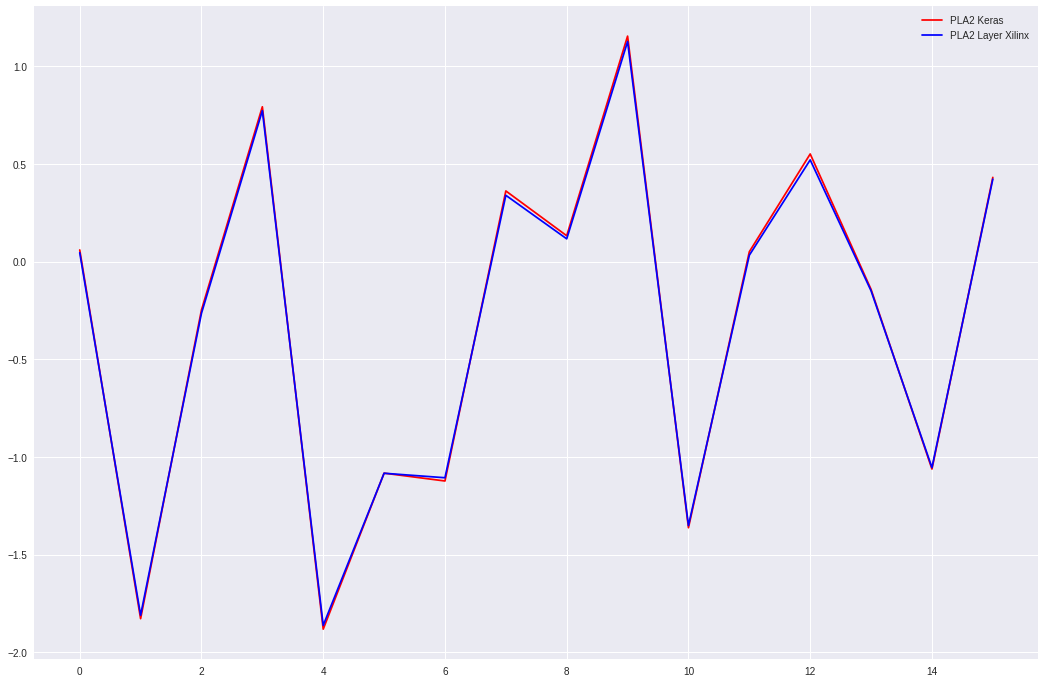

In [0]:
q = np.array([[11863, 4294891519,23286,4294830665,   733882, 4294949824,      69920, 4294590075,     181933,     260442,     221873,     142739],
[4294492983, 4294963813, 4294902160,      38467,     780964, 4294833351, 4294820137, 4294785254,     137763, 4294838347,     140908, 4294842005],
[4294897942,      44683, 4294163385, 4294701847,     548884,       9952,     232387,     359274,     125835,     183420,     596631, 4294547803],
[    202394, 4294843802, 4294345536, 4294388276,      62751,     136735,     115137, 4294961378,     403717, 4294940196,     285231, 4294603892],
[4294479376, 4294915673, 4294788323, 4294910506,     399955,      19781, 4294775041, 4294695802,     119218, 4294912692, 4294838389, 4294866731],
[4294683354, 4294848109, 4293715280,       4577,     237688,     413196, 4294768769, 4294762193, 4294754658, 4294966936, 4294915998, 4294644302],
[4294677347,     250897, 4294187271,     274531,     801371, 4294715676, 4294867324, 4294518039, 4294601182, 4294868232, 4294853481, 4294832428],
[     88853,     113175, 4294904304,      18733,     248319, 4294745827,      95422,      86398, 4294859736,      74217, 4294770043,     362397],
[     30477, 4294719892, 4294360330, 4294761658, 4294896340,     386250,     121811, 4294782936,      30121,      67523,      54089,      24834],
[    295064, 4294619313, 4294527747,     326504,      81839,     370160, 4294815923, 4294467544,     266224,     254127, 4294841102,     533416],
[4294613218, 4294578368, 4294875421,     123003,     609794,     122307, 4294686570, 4294235632,     252289, 4294889301, 4294690592,     647593],
[      8519, 4294854779, 4294809514,     168397,      42770,     105983, 4294956991,     236091, 4294605001,      44886,       5327,      94957],
[    136351,      38510, 4294644428, 4294455958,     875944, 4294589757,     215560,      40831, 4294766051, 4294851609,     269988,      32759],
[4294928000,       5316, 4294824853, 4294591574,     292361,     124421,       1291,     169384,     282587,      38853,     200875, 4294659060],
[4294690981, 4294851989, 4294311432, 4294648172,     108229,     278075, 4294940567,     250473, 4294949442,      60855,     172714, 4294610470],
[    110503, 4294883530, 4294333698, 4294815139,     102182, 4294869067,      46950,      51006, 4294797024,      80492,      23257,      39292]])
L = 16
K = 12
for i in range(0 , L):
  for j in range(0 , K):
    if(q[i,j]>4200000000):
      q[i,j] = q[i,j]-4294967296;
np.set_printoptions(4,10000,150)
np.set_printoptions(suppress=True)


plt.plot(p[:,:,:,0].reshape((16,1)), "r", markersize=10)
plt.plot(q[:,0]/65536/4, "b", markeredgewidth=3, markersize=10)
plt.legend(["PLA2 Keras", "PLA2 Layer Xilinx"])
print (np.sqrt(np.mean(np.square((p[:,:,:,0].reshape((16,1))-q[:,0]/65536/4)))))
print(np.column_stack((p[:,:,:,0].reshape((16,1)),q[:,0]/65536/4)))

# **Trained Poped Model Output (Three Layers)**

In [0]:
model4 = Sequential()
for layer in model3.layers[:-1]:
  model4.add(layer)# just exclude last layer from copying
model4.summary()
w = np.reshape(x_train[index],(28,28))
p = model4.predict(np.reshape(w,(1,28,28,1)))
np.set_printoptions(4,10000,150)
np.set_printoptions(suppress=True)
print (repr(p[:,:,:,0].reshape((8,8))))
print (repr(p[:,:,:,1].reshape((8,8))))
print (repr(p[:,:,:,2].reshape((8,8))))
print (repr(p[:,:,:,3].reshape((8,8))))
print (repr(p[:,:,:,4].reshape((8,8))))
print (repr(p[:,:,:,5].reshape((8,8))))
p.shape

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         150       
_________________________________________________________________
average_pooling2d_1 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 12)          1800      
Total params: 1,950
Trainable params: 1,950
Non-trainable params: 0
_________________________________________________________________
array([[ 0.2251,  0.2907, -0.5305, -1.0756, -0.8565,  2.0216,  1.3091,
         0.4331],
       [ 0.2699, -0.5483, -2.4841, -3.218 , -2.5098,  0.354 ,  0.8978,
         0.5272],
       [-1.2918, -2.2886, -3.64  , -1.5432, -1.1677, -0.3443,  1.0022,
         0.3014],
       [-2.3776, -1.5647, -0.5256,  1.3786, -1.2244, -1.7544, -0.0184,
         0.16  ],
       [-1.1648,  0.186 ,  1.8531,  1.6399, -1.3

(1, 8, 8, 12)

# **Trained Poped Model Output (Two Layers)**

In [0]:
model5 = Sequential()
for layer in model4.layers[:-1]:
  model5.add(layer)# just exclude last layer from copying
model5.summary()
w = np.reshape(x_train[index],(28,28))
p = model5.predict(np.reshape(w,(1,28,28,1)))
np.set_printoptions(4,10000,150)
np.set_printoptions(suppress=True)
#print (p)
print(repr(p[:,:,:,0]))
print(repr(p[:,:,:,1]))
print(repr(p[:,:,:,2]))
print(repr(p[:,:,:,3]))
print(repr(p[:,:,:,4]))
print(repr(p[:,:,:,5]))
p.shape

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         150       
_________________________________________________________________
average_pooling2d_1 (Average (None, 12, 12, 6)         0         
Total params: 150
Trainable params: 150
Non-trainable params: 0
_________________________________________________________________
array([[[ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.015 , -0.2404,
         -0.3089, -0.1457, -0.0362,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.0008,  0.0026, -0.1956, -0.0168,
          0.3337, -0.0835, -0.2466, -0.0304,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.0412, -0.2413, -0.0483,  0.0397,
         -0.2371, -0.0268,  0.0008, -0.137 ,  0.    ],
        [ 0.    ,  0.    ,  0.0117, -0.1714, -0.1217,  0.0742, -0.1715,
          0.1768, -0.3622,  0.0305, -0.2942, -0.029 ],
        [ 0.    ,  0.0064, -0.04

(1, 12, 12, 6)

0.2217169623043579


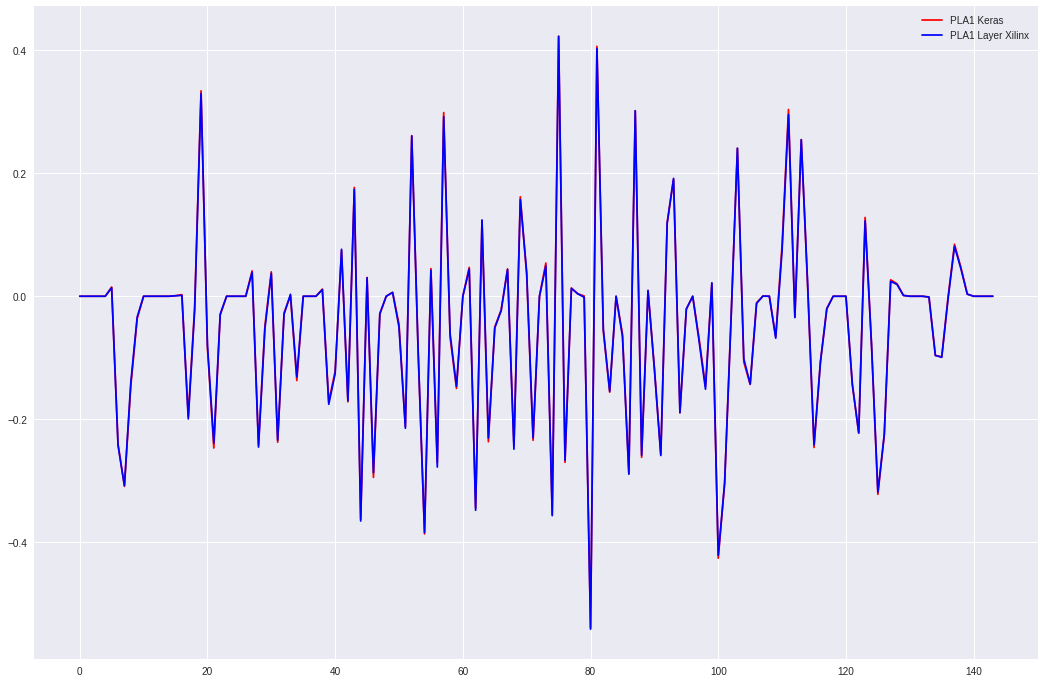

In [0]:
q = np.array([[         0,          0,          0,          0,          0,          0],
[         0,          0,          0,          0,          0,          0],
[         0,          0,          0,          0,          0,          0],
[         0,          0,          0,          0,          0,          0],
[         0,          0,          0,          0,          0,          0],
[      3588,      18915, 4294955309, 4294956196,       6796,      19780],
[4294903797,     103329, 4294945029, 4294903401,      46626,      67505],
[4294886662,     182168,       6409, 4294938871,      71505,      72559],
[4294930578,     128756,      34077,      30105,      59897,      47499],
[4294958453,      26267,      20561,      13008,      30979, 4294966825],
[         0,          0,          0,          0,          0,          0],
[         0,          0,          0,          0,          0,          0],
[         0,          0,          0,          0,          0,          0],
[         0,          0,          0,          0,          0,          0],
[         0,          0,          0,          0,          0,          0],
[       210,        480, 4294966946, 4294967116,        130,        550],
[       346,      19564, 4294955326, 4294955384,       7814,      20640],
[4294915064,     124134, 4294944585, 4294858005,      37632,      51494],
[4294961382,     248817, 4294965802, 4294786347, 4294893575, 4294908720],
[     86311,     342741,      30765, 4294870045, 4294770399, 4294870142],
[4294946621,     367538,      55301,      32048, 4294885729, 4294960206],
[4294904776,     200986,      32994,      18885,      32183,      80798],
[4294959698,       9325,      12799,       7846,      17588, 4294963043],
[        0,          0,          0,          0,          0,          0],
[         0,          0,          0,          0,          0,          0],
[         0,          0,          0,          0,          0,          0],
[         0,          0,          0,          0,          0,          0],
[     10201,      32049, 4294951262, 4294946095,       8696,      27515],
[4294903087,     153056, 4294952191, 4294851291,      35982,      42020],
[4294953492,     226797, 4294965295, 4294761887, 4294886042, 4294913960],
[      9755,     118987,      23286, 4294783301, 4294724863, 4294926221],
[4294906046,       6626,      42969, 4294850750, 4294777027,      58439],
[4294959637,     104069,      28839, 4294837762, 4294881748, 4294956691],
[       822,     274299,      33170,      19267,       7872,      10074],
[4294932914,     118711,      30639,      12210,      16763,      25832],
[         0,          0,          0,          0,          0,          0],
[         0,          0,          0,          0,          0,          0],
[         0,          0,          0,          0,          0,          0],
[      2791,      14712, 4294958359, 4294958320,       5213,      14905],
[4294921300,     110928, 4294937174, 4294846104,      31170,      41369],
[4294934314,     166155, 4294953482, 4294749232, 4294834423, 4294889357],
[     19988,       8347,      46802, 4294872657, 4294695643, 4294904103],
[4294922784, 4294789264,      55675, 4294805824, 4294755962,       6482],
[     45456, 4294776088,      19186, 4294893816, 4294823212, 4294958107],
[4294871586, 4294877197, 4294940978, 4294708749, 4294875363,      60633],
[      7837,      45606,      10022,      33759, 4294893130, 4294962508],
[4294892141,     172543,      26280, 4294952408,      81215,      65403],
[4294959921,       5640,       7530,       3755,       5690, 4294963141],
[         0,          0,          0,          0,          0,          0],
[      1603,       3527, 4294965056, 4294965710,        867,       3625],
[4294954187,      88877, 4294939786, 4294875150,      26292,      40334],
[4294911091,     135442,       3588, 4294771991, 4294872520, 4294897764],
[     68271, 4294888391,      46027, 4294871835, 4294694136, 4294891391],
[4294944102, 4294784147,      63622,         47, 4294857792,      85474],
[4294866662, 4294730594,      25855, 4294858836,      43762,     108369],
[     11063, 4294701861,      22589, 4294958636,      41349,      78206],
[4294894576, 4294837914, 4294943388, 4294675729,      30924,      31157],
[     76438, 4294967242,      28466, 4294951586, 4294808354, 4294918706],
[4294951420,     236787,      28416,      18798,      65757,      48464],
[4294928956,      48120,      14180, 4294966721,       5955,       8555],
[         0,          0,          0,          0,          0,          0],
[     11572,      38579, 4294948301, 4294936572,       9370,      30424],
[4294876154,     106772, 4294948389, 4294753221, 4294929153, 4294938717],
[     32429, 4294927307,      29461, 4294910038, 4294738447, 4294913797],
[4294906930, 4294798202,      78231,      10697, 4294929330,     132838],
[4294953792, 4294825636,       7011, 4294936009,      87596,      60303],
[4294961146, 4294929251,        461, 4294937988,      59261,        543],
[     11402, 4294951334,       5904,       5772,      12398,       7095],
[4294902199, 4294921810, 4294941822, 4294698215, 4294920475,       4480],
[     41166, 4294882369,      33912, 4294911591, 4294725986, 4294934128],
[     10133,     159982,      32039,      47626,      57366,      49134],
[4294907026,      64146,       1436, 4294938936,      26716,      17990],
[         0,          0,          0,          0,          0,          0],
[     12910,      54973, 4294937057, 4294866273, 4294966119,      13443],
[4294873884,       4312,       9901, 4294737385, 4294792356, 4294879712],
[    110637, 4294899328,      71216,      86451, 4294828298,      68032],
[4294897486,      30846,      27715, 4294940723,     102475,      53252],
[      3327, 4294957539, 4294959215, 4294956153,      23486, 4294961868],
[      1017, 4294966509, 4294966424, 4294967010,       2831, 4294966514],
[4294966866,      33593, 4294948705, 4294943415,      14095,      32364],
[4294825535, 4294959274, 4294966350, 4294710884, 4294926781,      14626],
[    105475, 4294815811,      56350, 4294961088, 4294728152, 4294930794],
[4294953227,      70129,      29856,      29932,      53820,      42226],
[4294926859,      37972, 4294949634, 4294926799,      28915,      13882],
[         0,          0,          0,          0,          0,          0],
[4294950117,       4273, 4294930509, 4294819228, 4294952509,      18095],
[4294891532, 4294841147,      33140, 4294802653, 4294752057, 4294921123],
[     78969, 4294963840,      54385,      95859,       8750,      87740],
[4294899607,      49069, 4294960169, 4294922707,      72798,       9746],
[      2394,       5472, 4294963306, 4294965244,       1482,       6270],
[4294936212,      53710, 4294944469, 4294926981,      28254,      48645],
[4294899491,     154475,       1047, 4294852881,      30439,      23452],
[     31073,      26699,      44667, 4294833104, 4294801403, 4294861751],
[     50205, 4294815934,      62573,      60597, 4294808872,      56408],
[4294917825, 4294950153, 4294965364, 4294933865,      91258,      48837],
[4294961808, 4294967208, 4294954520, 4294947828,      24452, 4294962124],
[         0,          0,          0,          0,          0,          0],
[4294948169, 4294958452, 4294939507, 4294814299, 4294953122,      22051],
[4294927708, 4294905367,      27160, 4294805916, 4294782885, 4294956641],
[      5693,     176320,      40706,      61606,      73185,     104440],
[4294856972,     191307, 4294954837, 4294903499,     116290,      97003],
[4294887777,     189122,       1924, 4294902626,      80787,      77748],
[4294957103,     249685,      35722, 4294847047,       1006, 4294936590],
[     63028,     132530,      27981, 4294888012, 4294781974, 4294844084],
[4294940670, 4294864734,      48736,      20374, 4294822422,      76231],
[4294929901, 4294862465,      26197, 4294952159,      69923,      83971],
[4294964233, 4294951972, 4294951149, 4294942301,      57129, 4294956043],
[        72, 4294967188, 4294966900, 4294966912,        528, 4294966948],
[         0,          0,          0,          0,          0,          0],
[4294949438, 4294928836, 4294952593, 4294835574, 4294940558, 4294967205],
[     19724, 4294865107, 4294967201, 4294745129, 4294730659, 4294906529],
[     77297,     258222,      28086, 4294883962, 4294862924, 4294928039],
[4294958230,     451590,      34199, 4294821851, 4294904453, 4294932963],
[     66654,     285385,      36838, 4294866191, 4294755623, 4294825784],
[      5279,      34172,       9941, 4294896284, 4294699047, 4294900480],
[4294904043, 4294791255,      37794, 4294960816, 4294837679,      91931],
[4294939213, 4294883738,      14761, 4294948020,      82466,      60490],
[4294961941, 4294964324, 4294951218, 4294944298,      41206, 4294959100],
[         0,          0,          0,          0,          0,          0],
[         0,          0,          0,          0,          0,          0],
[         0,          0,          0,          0,          0,          0],
[4294929841, 4294899336, 4294962492, 4294908391, 4294964536,      12599],
[4294909042, 4294645735, 4294964666, 4294796546, 4294806722,      13853],
[     32073, 4294637776, 4294961203, 4294816282, 4294740299, 4294879319],
[4294946800, 4294771485, 4294942010, 4294827925, 4294736222, 4294900208],
[4294883900, 4294718622,      11163, 4294898196, 4294825727,      84756],
[4294908388, 4294734367,      40740, 4294934346,      51785,     117418],
[      6333, 4294866921,       7987, 4294941878,      97088,      32341],
[      5013, 4294955445, 4294956959, 4294954394,      37786, 4294960553],
[       336, 4294966792, 4294965448, 4294965504,       2464, 4294965672],
[         0,          0,          0,          0,          0,          0],
[         0,          0,          0,          0,          0,          0],
[         0,          0,          0,          0,          0,          0],
[4294966935, 4294956428,       8667, 4294959746,       3769,       4849],
[4294942099, 4294850962,      35751, 4294924139,       8630,      48327],
[4294941290, 4294683221,      47400, 4294927783,      13012,     108726],
[4294966415, 4294662800,      44956, 4294939039,      67654,      93910],
[     21210, 4294814283,      22963, 4294949228,     101541,      37906],
[     11771, 4294941789, 4294959770, 4294956459,      54158, 4294963671],
[       870, 4294965991, 4294962511, 4294962656,       6380, 4294963091],
[         0,          0,          0,          0,          0,          0],
[         0,          0,          0,          0,          0,          0],
[         0,          0,          0,          0,          0,          0],
[         0,          0,          0,          0,          0,          0]])
L = 144
K = 6
for i in range(0 , L):
  for j in range(0 , K):
    if(q[i,j]>4200000000):
      q[i,j] = q[i,j]-4294967296;
np.set_printoptions(4,10000,150)
np.set_printoptions(suppress=True)
plt.plot(p[:,:,:,0].reshape((144,1)), "r", markersize=10)
plt.plot(q[:,0]/65536/4, "b", markeredgewidth=3, markersize=10)
plt.legend(["PLA1 Keras", "PLA1 Layer Xilinx"])

print (np.sqrt(np.mean(np.square((p[:,:,:,0].reshape((144,1))-q[:,0]/65536/4)))))
#print(np.column_stack((p[:,:,:,5].reshape((144,1)),q[:,5]/65536/4)))



# **Trained Poped Model Output (One Layers)**

In [0]:
model6 = Sequential()
for layer in model5.layers[:-1]:
  model6.add(layer)# just exclude last layer from copying
model6.summary()
w = np.reshape(x_train[index],(28,28))
p = model6.predict(np.reshape(w,(1,28,28,1)))
np.set_printoptions(4,10000,150)
np.set_printoptions(suppress=True)
print (repr(p))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         150       
Total params: 150
Trainable params: 150
Non-trainable params: 0
_________________________________________________________________
array([[[[ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
         [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
         [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
         [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
         [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
         [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
         [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
         [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
         [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
         [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
         [ 0.    ,  0.